In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load configuration table
CONFIGS_FILE = pd.read_excel("2023-12-30_Library.xlsx", "Sheet1")

# load results table
RESULTS_FILE = pd.read_excel("Results.xlsx", "Sheet1")

CONFIGS_FILE

,# CONFIG,EMU TIME [s],INH RATIO,MAX_PCON,NRNs EXC,NRNs INH,RS [%],μRS,θRS,σRS,...,σLTS,G_M LTS,SYNs EXC,SYNs INH,EXC SYNs RATIO [%],WSYN AMPA,WSYN NMDA,INH SYNs RATIO [%],WSYN GABAA,WSYN GABAB
0,1,600,0.200,0.6,RS,FS,100,0.0250,6.2,0.06,...,NaN,NaN,AMPA-NMDA,GABAA,100/0,0.1,NaN,100/0,1,NaN
1,2,600,0.300,0.6,RS,FS,100,0.0250,6.2,0.06,...,NaN,NaN,AMPA-NMDA,GABAA,100/0,0.1,NaN,100/0,1,NaN
2,3,600,0.250,0.6,RS,FS,100,0.0250,6.2,0.06,...,NaN,NaN,AMPA-NMDA,GABAA,100/0,0.1,NaN,100/0,1,NaN
3,4,600,0.230,0.6,RS,FS,100,0.0250,6.2,0.06,...,NaN,NaN,AMPA-NMDA,GABAA,100/0,0.1,NaN,100/0,1,NaN
4,5,600,0.230,0.8,RS,FS,100,0.0250,6.2,0.06,...,NaN,NaN,AMPA-NMDA,GABAA,100/0,0.1,NaN,100/0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,1321,600,0.215,0.3,RS,FS,100,0.0257,6.2,0.06,...,NaN,NaN,AMPA-NMDA,GABAA,50/50,0.1,0.50,100/0,1,NaN
394,1322,600,0.215,0.3,RS,FS,100,0.0257,6.2,0.06,...,NaN,NaN,AMPA-NMDA,GABAA,50/50,0.1,0.75,100/0,1,NaN
395,1323,600,0.215,0.3,RS,FS,100,0.0257,6.2,0.06,...,NaN,NaN,AMPA-NMDA,GABAA,50/50,0.1,0.10,100/0,1,NaN
396,1324,600,0.215,0.3,RS,FS,100,0.0257,6.2,0.06,...,NaN,NaN,AMPA-NMDA,GABAA,50/50,0.1,0.25,100/0,1,NaN


In [2]:
def analyze(CONFIGS_FILE, RESULTS_FILE, NO, FT):

    if FT == 'PC':
        ylab = "Pearson's Coefficient"
    elif FT == 'MFR':
        ylab = "Mean Firing Rate"
    elif FT == 'MBR':
        ylab = "Mean Bursting Rate"
    elif FT == 'ISI':
        ylab = "Inter-Spike Interval"
    elif FT == 'IBI':
        ylab = "Inter-Burst Interval"
    elif FT == 'BL':
        ylab = "Burst Length"
    elif FT == 'BI':
        ylab = "Burstiness Index"
    elif FT == 'RMSE':
        ylab = "Root Mean Square Error"

    # select columns in which there are different values
    col = []
    for column in CONFIGS_FILE.columns:
        if len(np.unique(CONFIGS_FILE[column]))>1:
            col.append(column)
        elif len(np.unique(CONFIGS_FILE[column]))==1 and not pd.isna(np.unique(CONFIGS_FILE[column])):
            col.append(column)
    # print(col)
    # pick only the columns with different values
    CONF_TAB = CONFIGS_FILE[col]
    # change name configurations number column
    RES_TAB = RESULTS_FILE.rename(columns={RESULTS_FILE.columns[0]:"# CONFIG"})    
    # name of features to group by
    FEAT_TO_GROUP = [col[i] for i in range(len(col)) if not(i in NO)]
    # print(FEAT_TO_GROUP)
    # group the table by the previously selected features and count how many elements are in each group
    GR_TAB_COUNT = CONF_TAB.groupby(FEAT_TO_GROUP, dropna=False)[[col[0]]].count()
    NP_GR_TAB_COUNT = np.concatenate(GR_TAB_COUNT.to_numpy())
    # print(NP_GR_TAB_COUNT)

    # group the table by the previously selected features and save only those columns in which the values change 
    GR_TAB = CONF_TAB.groupby(FEAT_TO_GROUP, dropna=False)[[col[0],col[NO[2]],col[NO[3]]]]

    igru = 0
    CONFS_IN_SELECTED_GROUPS_IN_TAB = []
    figs_title = []
    for cost_vals_TAB, var_vals_TAB in GR_TAB:
        if NP_GR_TAB_COUNT[igru]>3: 
            CONFS_IN_SELECTED_GROUPS_IN_TAB.append(var_vals_TAB['# CONFIG'].to_list())
            # print(cost_vals_TAB) # cose costanti del raggruppamento -> titolo per i grafici
            # print(var_vals_TAB) # gruppo che passa la selezione
            figs_title.append(', '.join([name+'='+str(value) for name, value in zip(FEAT_TO_GROUP,cost_vals_TAB)])) 
        igru=igru+1
    # CONF_TAB.groupby(FEAT_TO_GROUP, dropna=False).apply(display)

    for i in [2, 3]:
        if i==2:
            ii = 3
            scale = 'linear'
        else:
            ii = 2
            scale = 'linear'

        CONFS_IN_SELECTED_SUBGROUPS_OF_SELECTED_GROUPS =[]
        for CONFS_IN_GROUP in CONFS_IN_SELECTED_GROUPS_IN_TAB:
            SUBTAB_CONFS_IN_GROUP = CONF_TAB[CONF_TAB["# CONFIG"].isin(CONFS_IN_GROUP)]
    
            GR_SUBTAB_COUNT = SUBTAB_CONFS_IN_GROUP.groupby([col[NO[i]]])[[col[0]]].count() 
            NP_GR_SUBTAB_COUNT = np.concatenate(GR_SUBTAB_COUNT.to_numpy())
            # print(NP_GR_SUBTAB_COUNT)

            GR_SUBTAB = SUBTAB_CONFS_IN_GROUP.groupby([col[NO[i]]])[[col[0],col[NO[2]],col[NO[3]]]]
    
            igru = 0
            CONFS_IN_SELECTED_GROUPS_IN_SUBTAB = []
            for cost_vals_SUBTAB, var_vals_SUBTAB in GR_SUBTAB:
                if NP_GR_SUBTAB_COUNT[igru]>2 and len(np.unique(var_vals_SUBTAB[col[NO[ii]]]))>1:
                    CONFS_IN_SELECTED_GROUPS_IN_SUBTAB.append(var_vals_SUBTAB['# CONFIG'].to_list())
                    # print(cost_vals_SUBTAB)
                    # print(var_vals_SUBTAB)
                igru =igru+1
    
            CONFS_IN_SELECTED_SUBGROUPS_OF_SELECTED_GROUPS.append(CONFS_IN_SELECTED_GROUPS_IN_SUBTAB)
            # SUBTAB_CONFS_IN_GROUP.groupby([col[NO[i]]]).apply(display)
    
        for SELECTED_GROUP, fig_title in zip(CONFS_IN_SELECTED_SUBGROUPS_OF_SELECTED_GROUPS, figs_title):
            if len(SELECTED_GROUP)>0:
                fig, ax = plt.subplots(1, layout = 'tight', figsize = (20,5))
                xTicksName = []
                for CONFS_IN_SELECTED_SUBGROUP in SELECTED_GROUP:
                    filt_res = RES_TAB[RES_TAB["# CONFIG"].isin(CONFS_IN_SELECTED_SUBGROUP)]
                    # print(CONFS_IN_SELECTED_SUBGROUP)
                    # print(filt_res)
                    idxsorted = np.argsort(CONF_TAB[CONF_TAB["# CONFIG"].isin(CONFS_IN_SELECTED_SUBGROUP)][CONF_TAB.columns[NO[ii]]]) 
                    lab = CONF_TAB[CONF_TAB["# CONFIG"].isin(CONFS_IN_SELECTED_SUBGROUP)][CONF_TAB.columns[NO[i]]].iloc[0]
                    xTicksName.append(sorted(CONF_TAB[CONF_TAB["# CONFIG"].isin(CONFS_IN_SELECTED_SUBGROUP)][CONF_TAB.columns[NO[ii]]]))
                    ax.errorbar(sorted(CONF_TAB[CONF_TAB["# CONFIG"].isin(CONFS_IN_SELECTED_SUBGROUP)][CONF_TAB.columns[NO[ii]]]),filt_res[FT+' median'].iloc[idxsorted],[filt_res[FT+' median'].iloc[idxsorted] - filt_res[FT+' 25perc'].iloc[idxsorted], filt_res[FT+' 75perc'].iloc[idxsorted] - filt_res[FT+' median'].iloc[idxsorted]], label=CONF_TAB.columns[NO[i]]+'='+str(lab), fmt='o-', capsize=3)
                ax.axhline(y=RES_TAB[RES_TAB["# CONFIG"].isin([0])][FT+' median'].iloc[0], color = 'gray', label="RATs")
                ax.axhline(y=RES_TAB[RES_TAB["# CONFIG"].isin([0])][FT+' 25perc'].iloc[0], color = 'gray', linestyle = '--')
                ax.axhline(y=RES_TAB[RES_TAB["# CONFIG"].isin([0])][FT+' 75perc'].iloc[0], color = 'gray', linestyle = '--')
                ax.legend(fontsize=10)
                ax.set_xlabel(CONF_TAB.columns[NO[ii]])
                ax.set_ylabel(ylab)
                ax.set_title(fig_title, fontsize=8, fontweight="bold")
                ax.set_xscale(scale)

                xvalues = np.unique(np.concatenate(xTicksName))
                # print(xvalues)

                # print(isinstance(xvalues[0],str))
                if isinstance(xvalues[0],str):
                    # print(xvalues_def)
                    ax.set_xticks(xvalues)
                    # print([str(i) for i in xvalues_def])
                    ax.set_xticklabels([str(i) for i in xvalues], rotation = 60, ha = 'right')
                else:
                    nbin = 100
                    dx=(max(xvalues)-min(xvalues))/nbin
                    int_vector = [int(i) for i in (xvalues-min(xvalues))/dx]
                    idx_xvalues_def = [int_vector.index(idx) for idx in range(nbin+1) if idx in int_vector]
                    # print(xvalues[idx_xvalues_def])
                    xvalues_def = xvalues[idx_xvalues_def]

                    # print(xvalues_def)
                    ax.set_xticks(xvalues_def)
                    # print([str(i) for i in xvalues_def])
                    ax.set_xticklabels([str(i) for i in xvalues_def], rotation = 60, ha = 'right')
                plt.tight_layout()
                # plt.close(fig)


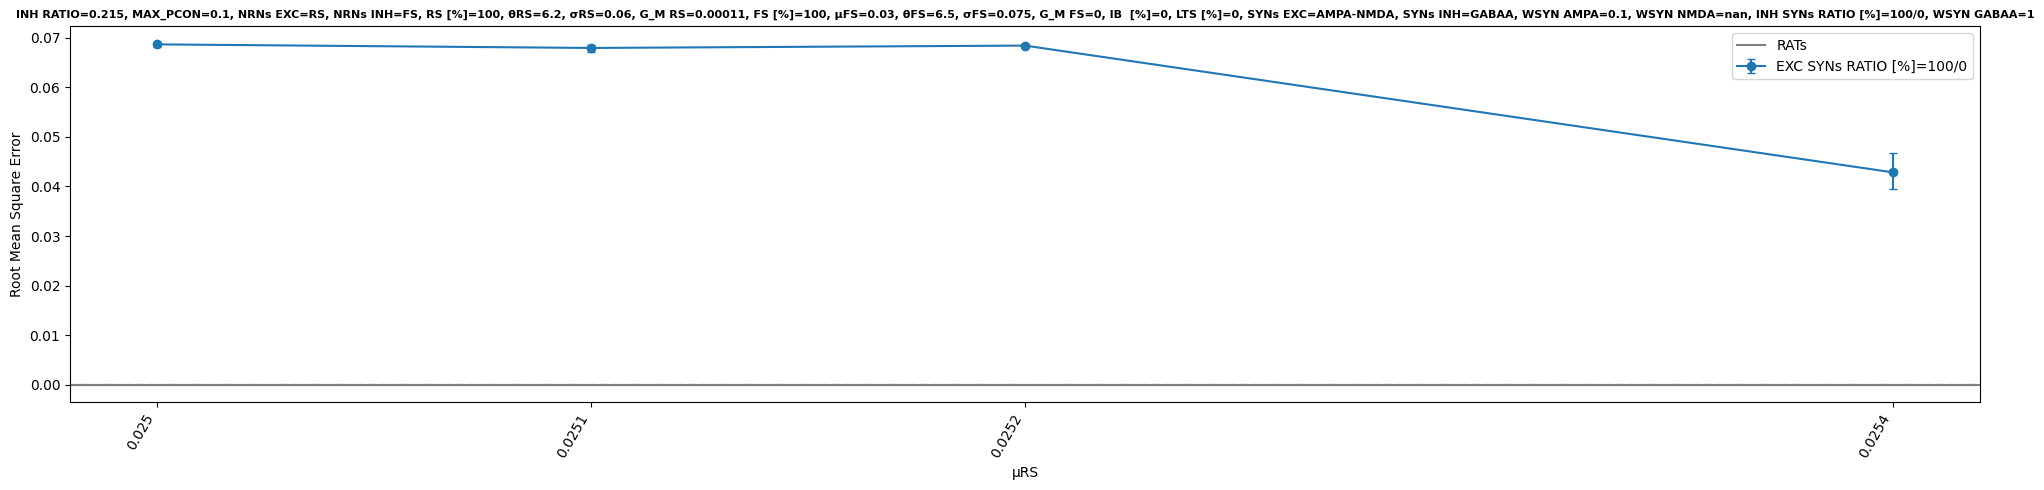

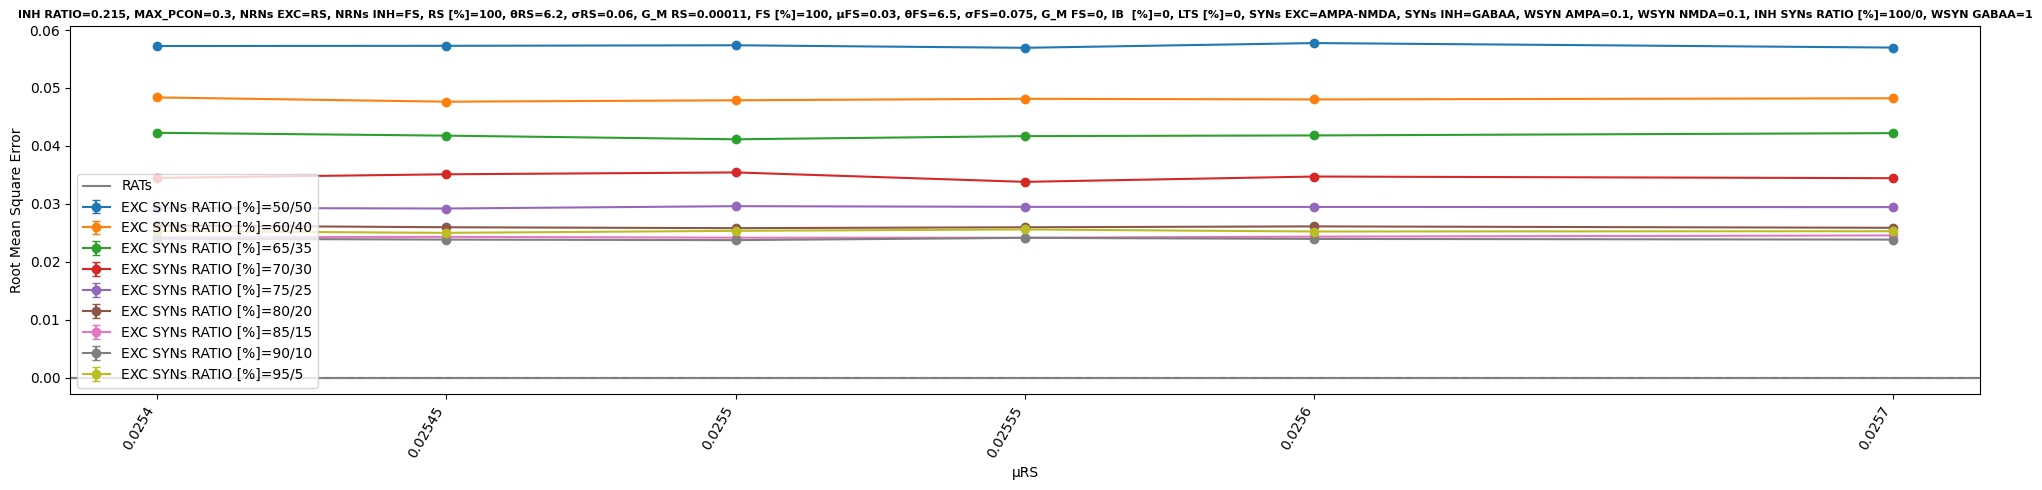

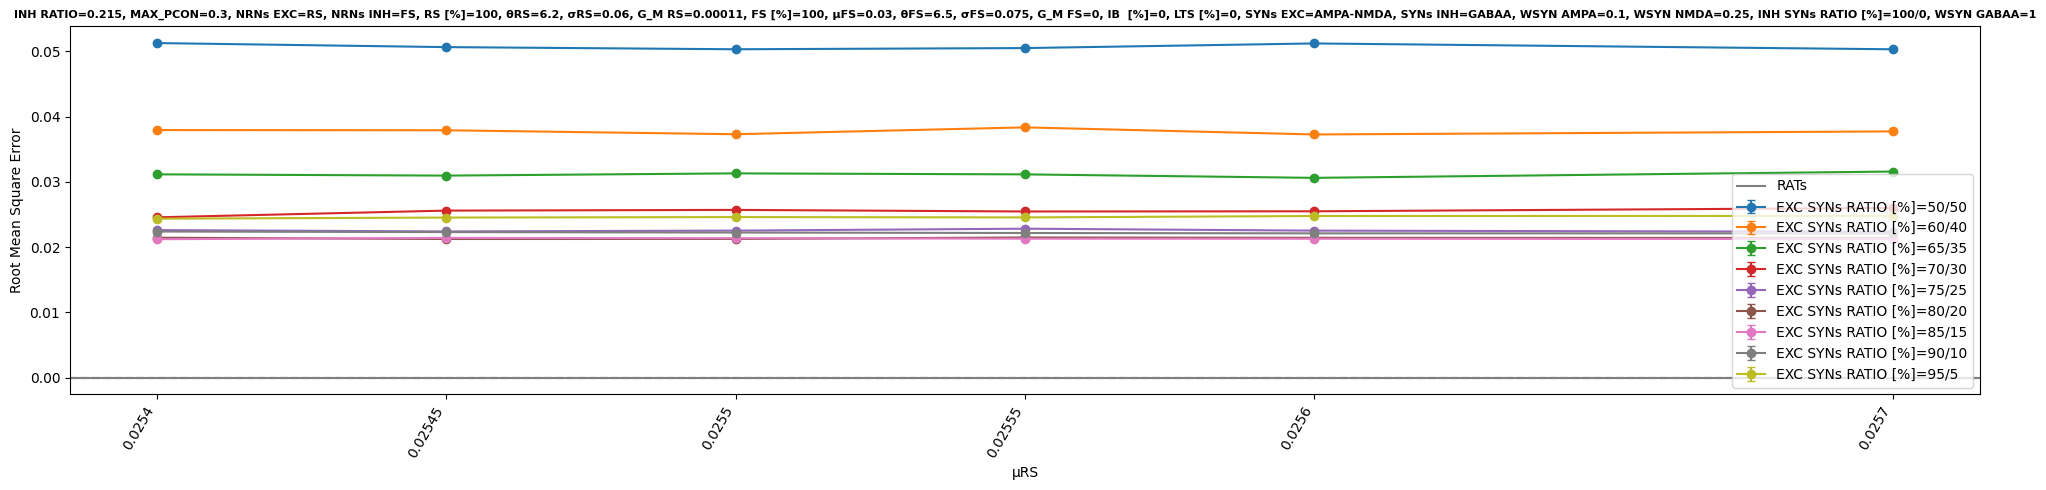

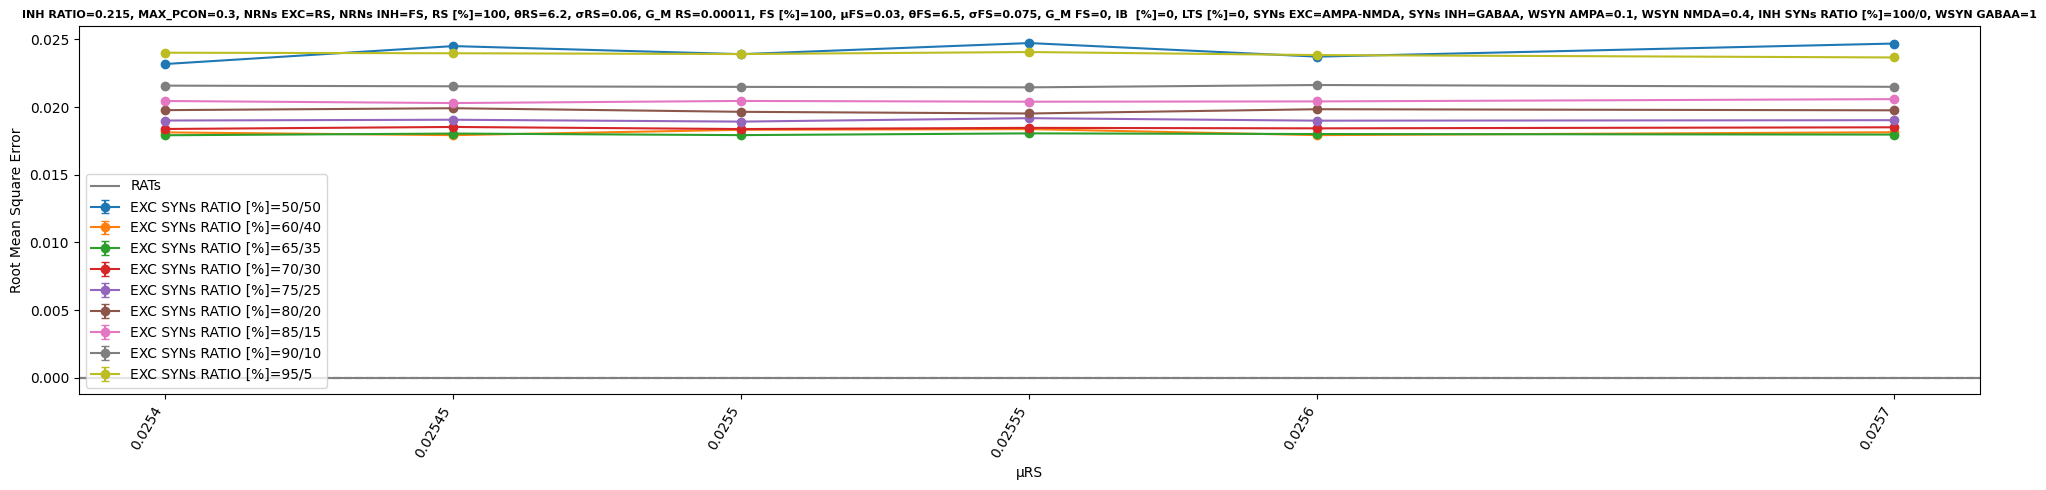

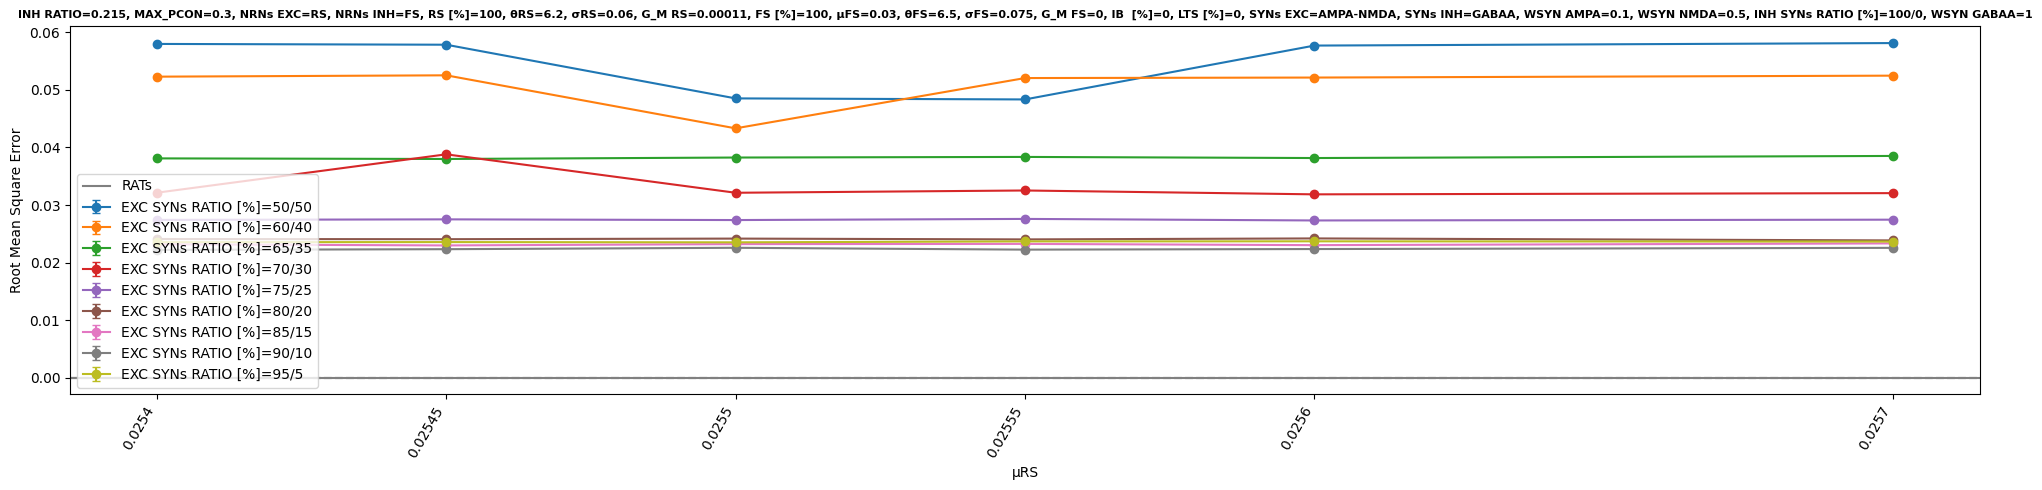

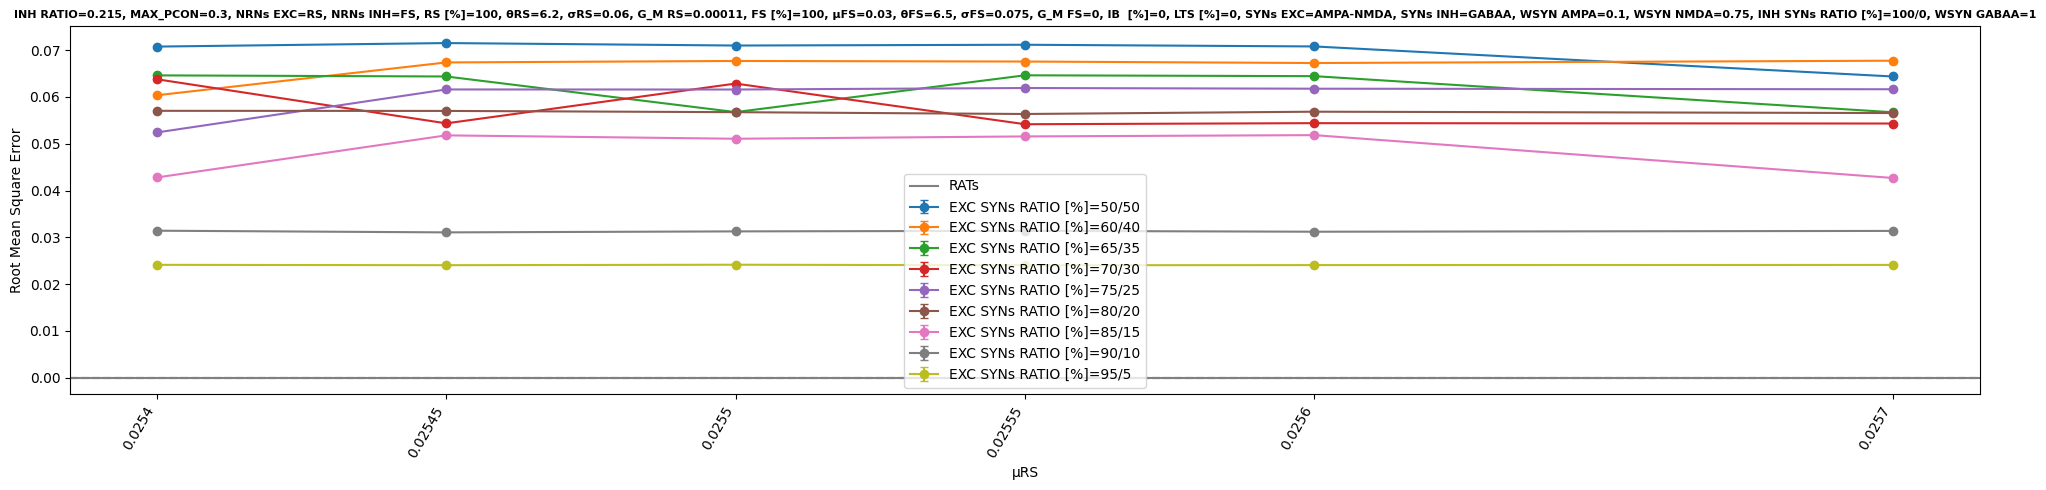

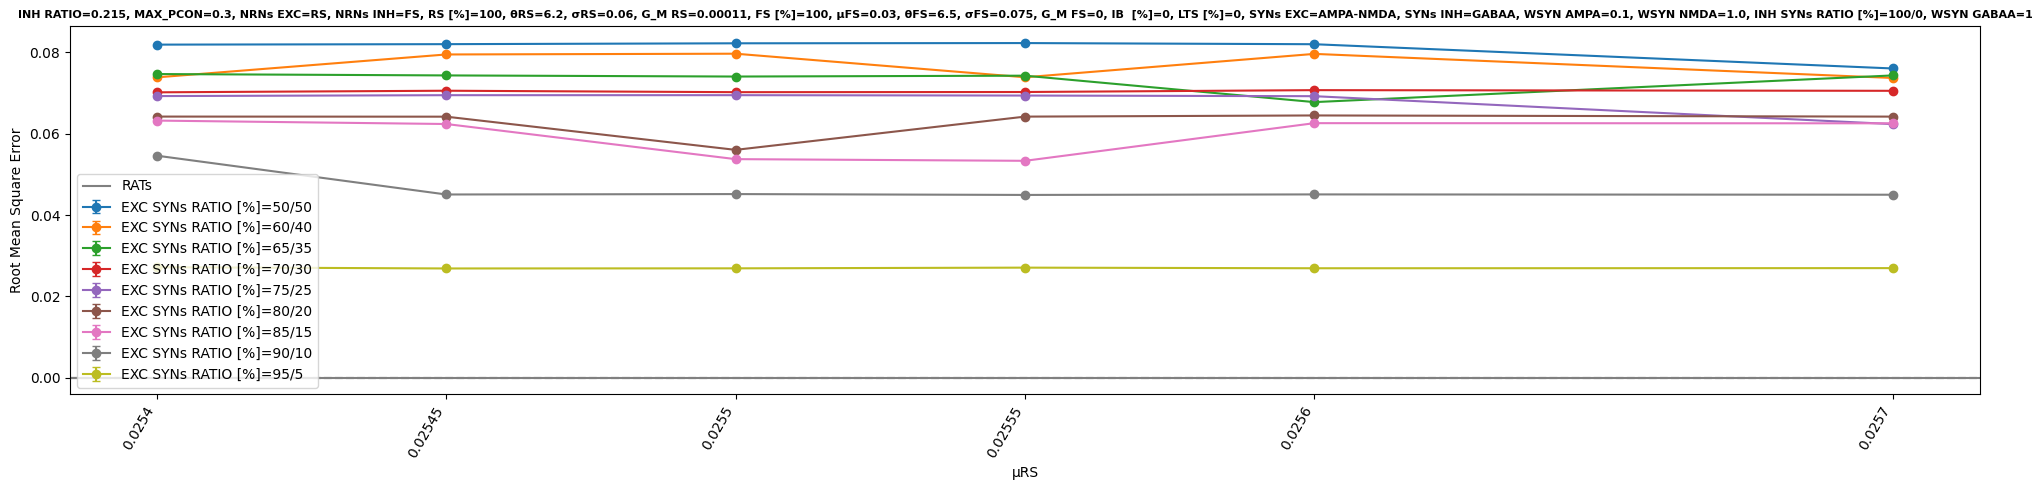

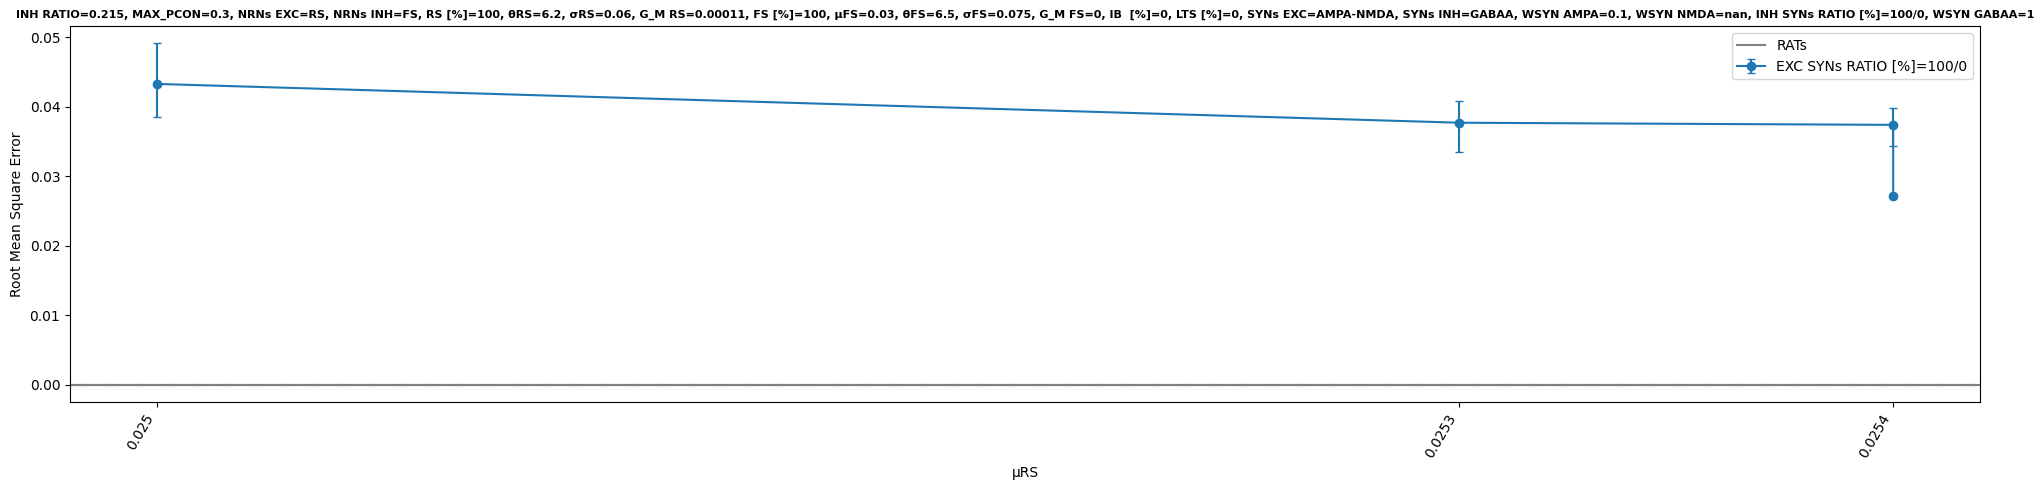

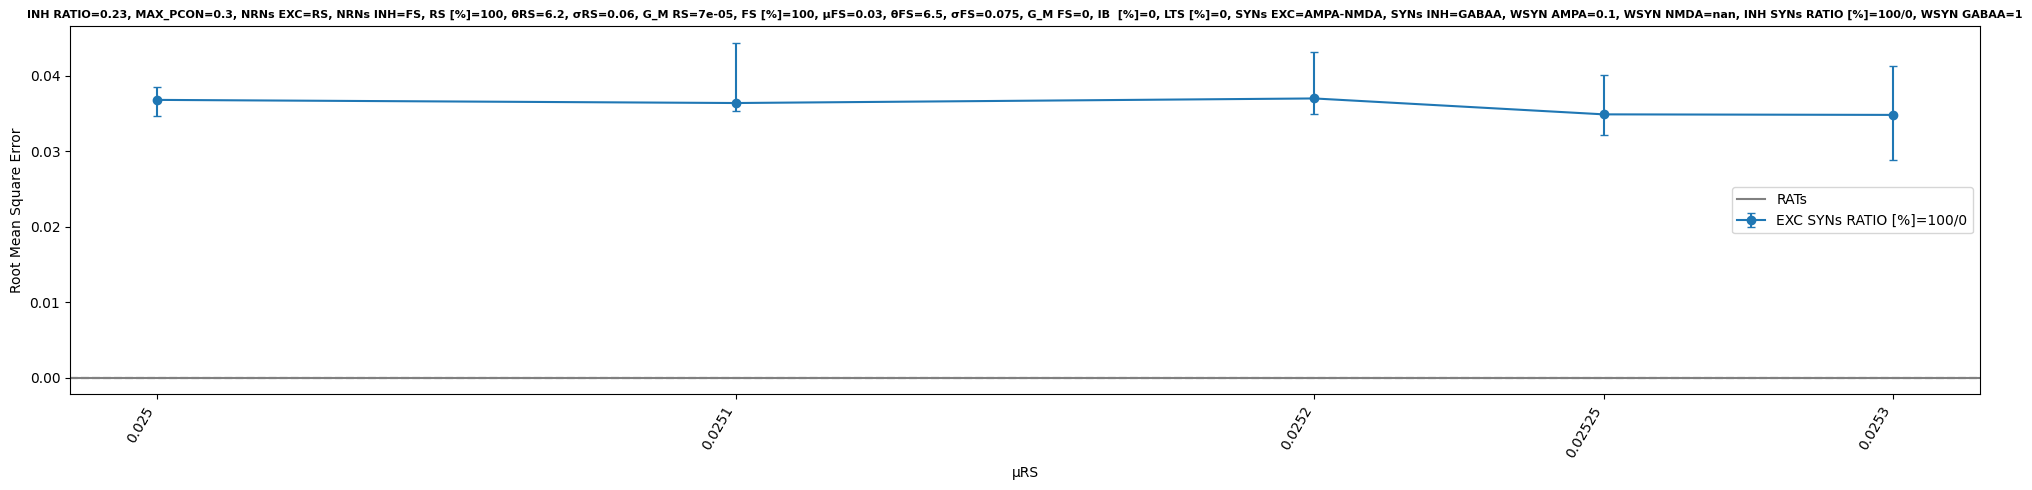

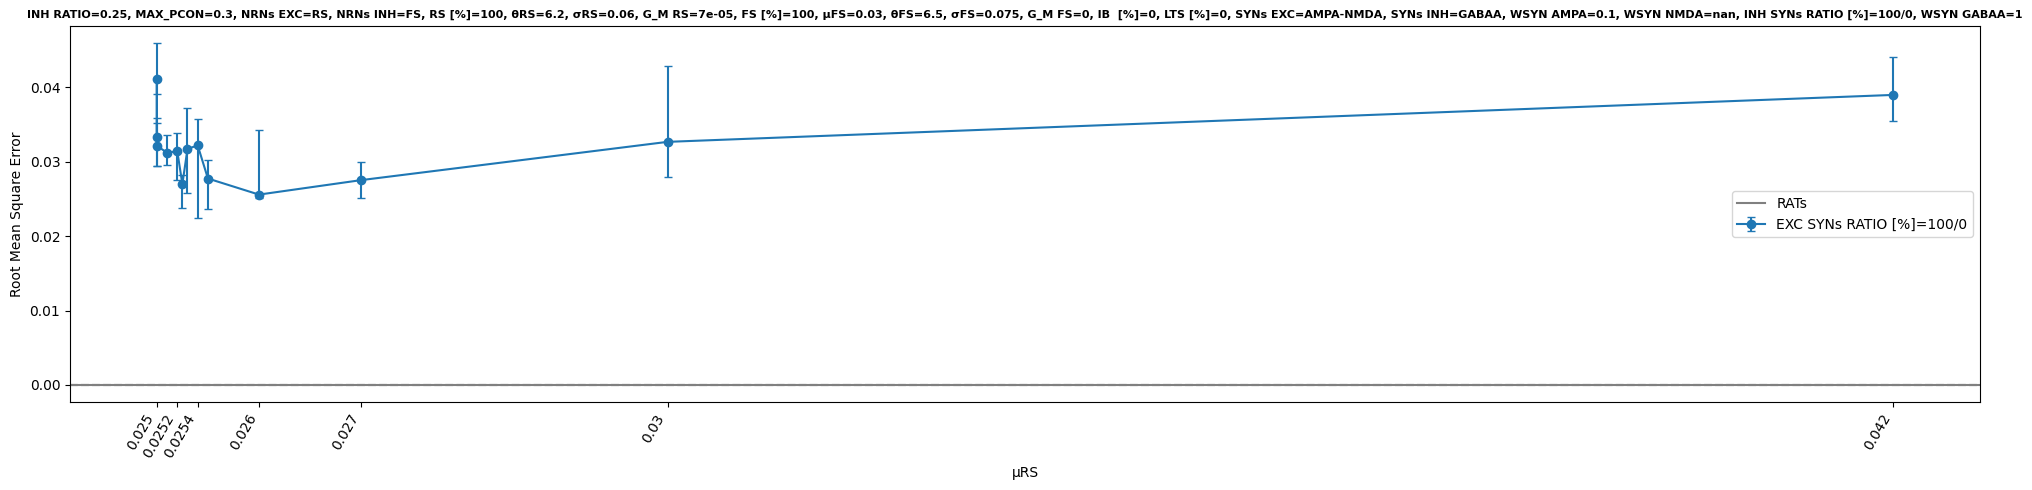

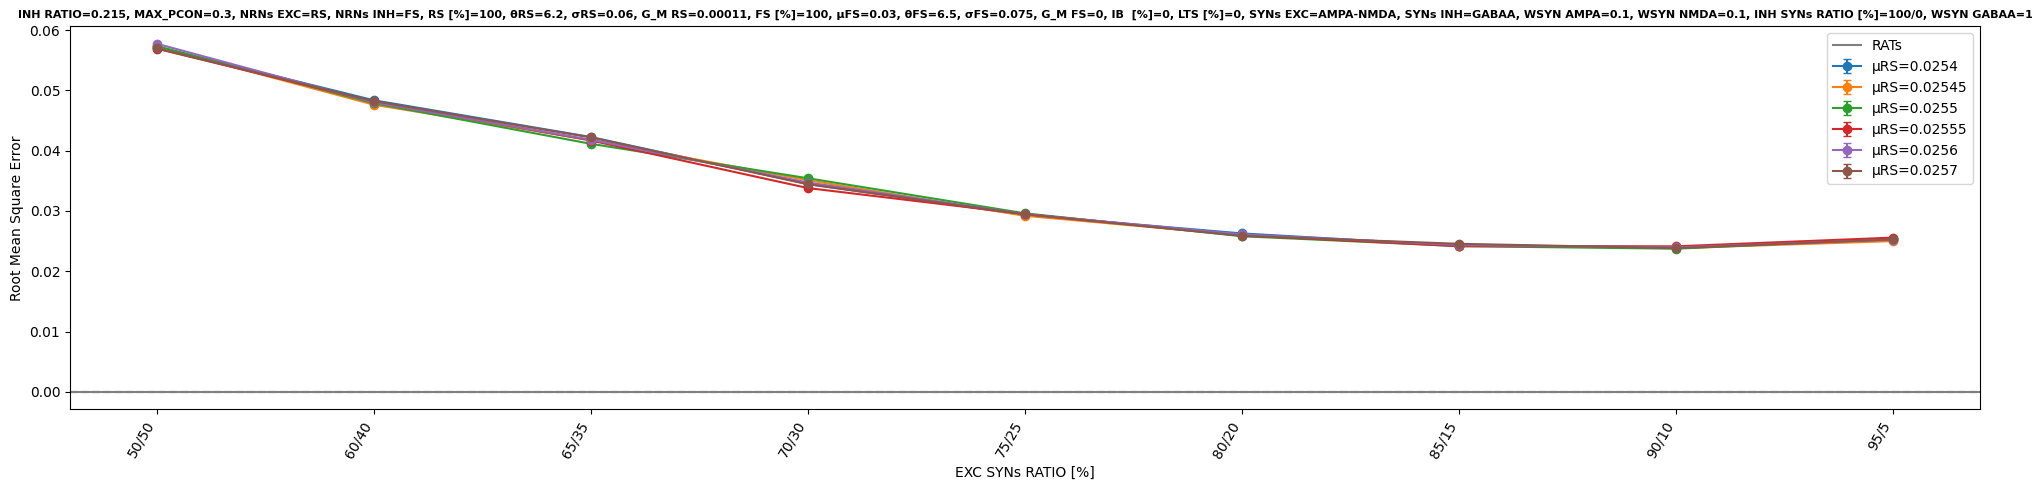

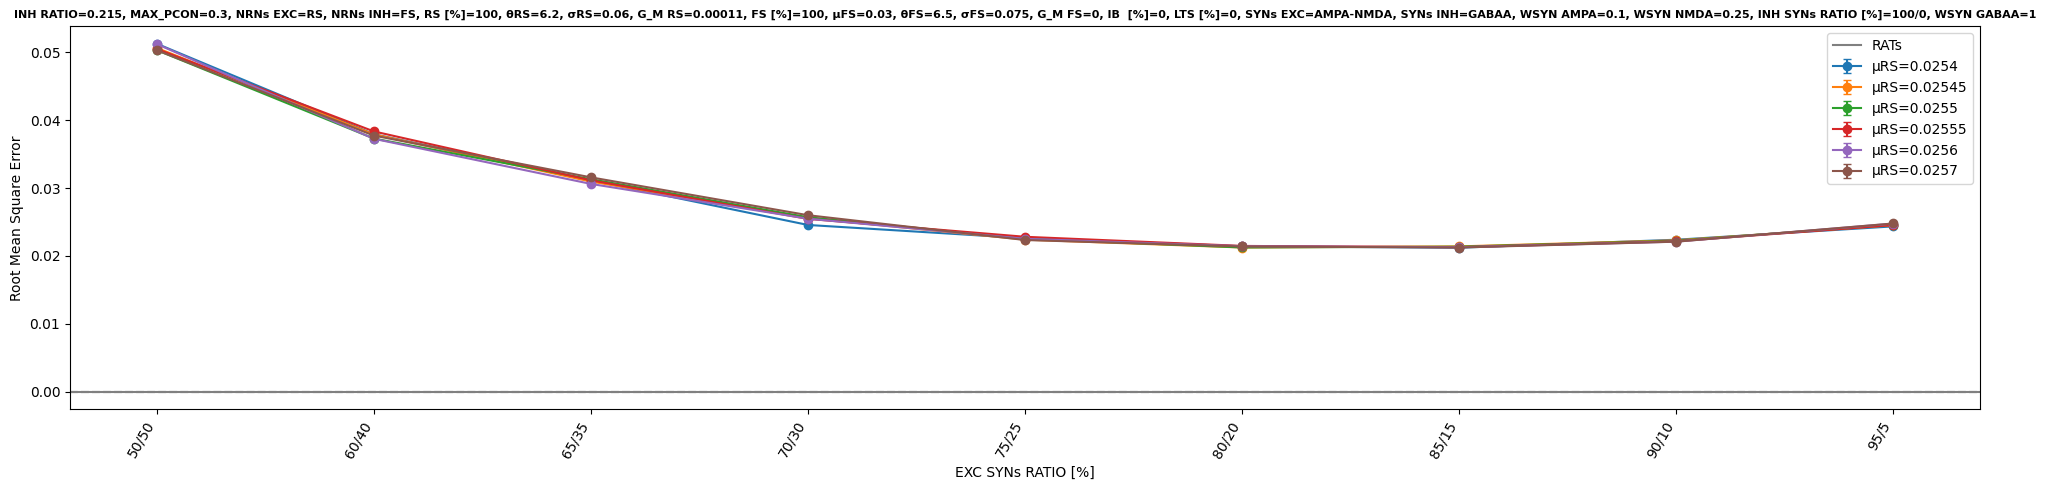

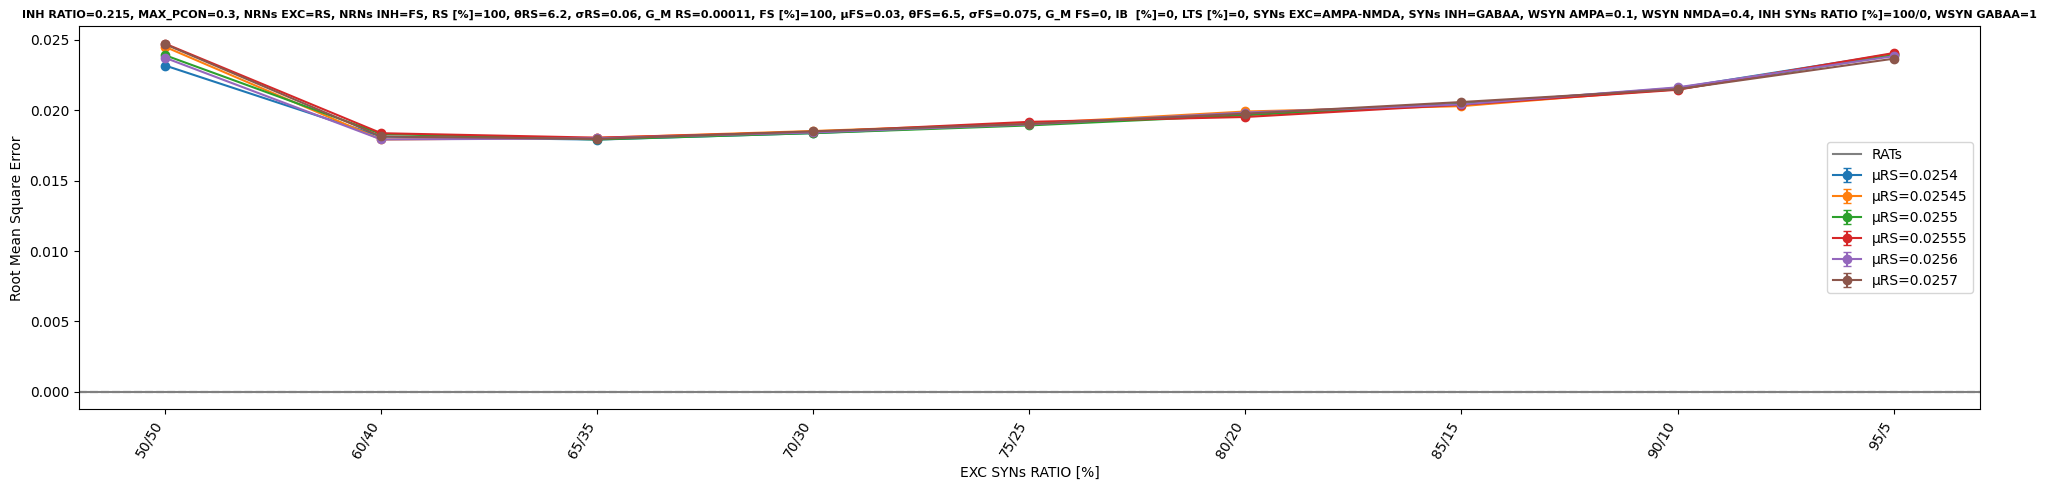

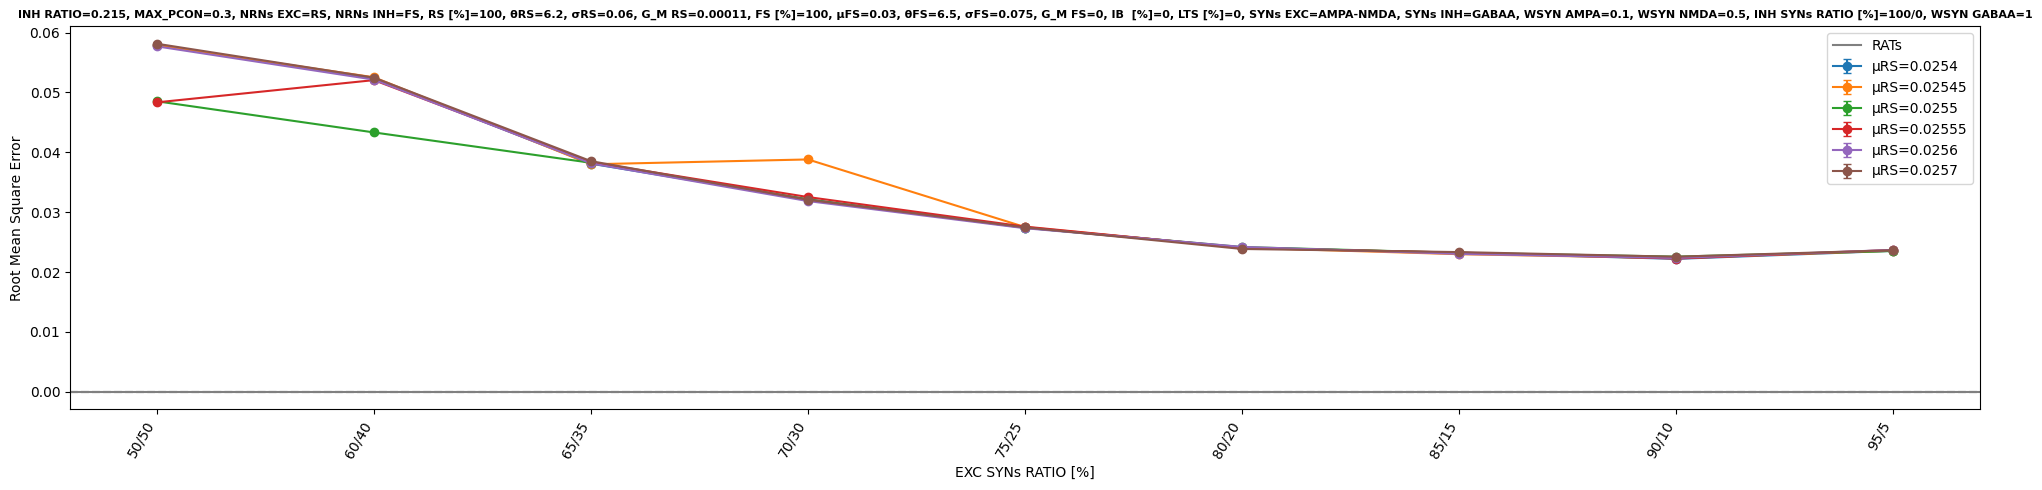

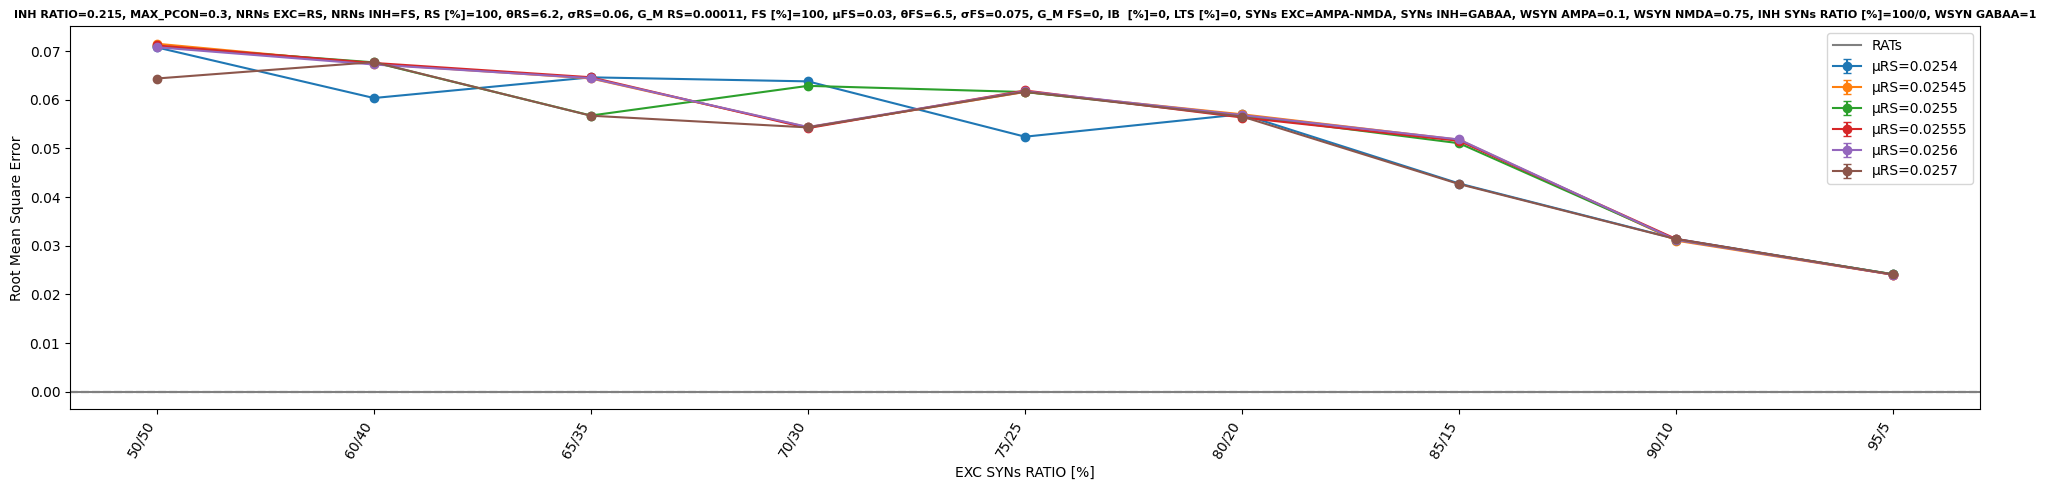

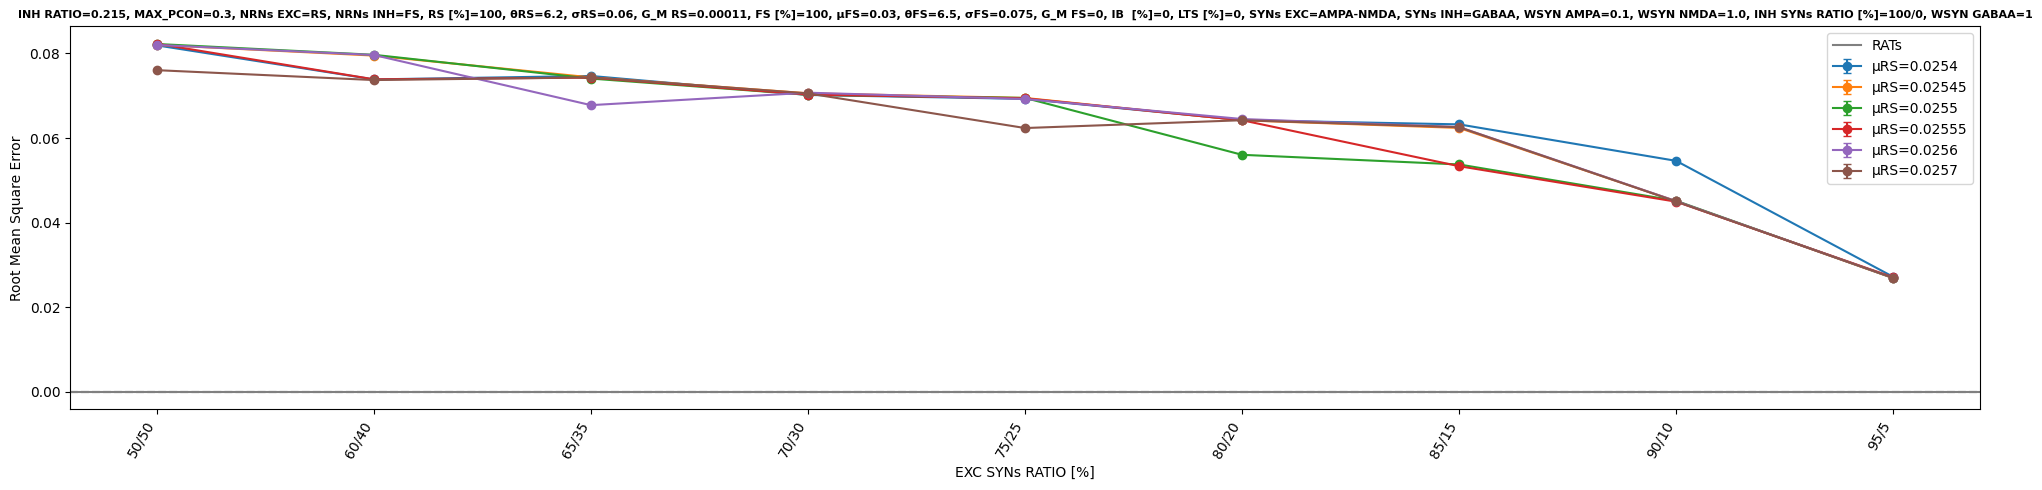

In [4]:
NO = [20,7]      # <EDIT> SELECT PARAMETERS TO VARY IN THE PLOTS
FT_VECTOR = ['PC','MFR','MBR','ISI','IBI','BL','BI','RMSE']

FT = 'RMSE'          # <EDIT> SELECT FEATURE TO VISUALIZE
analyze(CONFIGS_FILE, RESULTS_FILE, [0,1,*NO], FT)

# for FT in FT_VECTOR:
#     analyze(CONFIGS_FILE, RESULTS_FILE, [0,1,*NO], FT)